In [1]:
# from os import environ

In [2]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider(instance='ibm-q-skku/hackathon-2023/hackathon')

In [3]:
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()

# provider.backends()

# simulator_backend = provider.get_backend('ionq_simulator')

In [4]:
backend = provider.get_backend('ibm_hanoi') # 'ibmq_lima'

# 3-qubit repetition code

In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [6]:
nq = 5

creg_data = ClassicalRegister(3)
creg_anc = ClassicalRegister(2)
# creg = ClassicalRegister(nq)
qreg = QuantumRegister(nq)

qc = QuantumCircuit(qreg,creg_data,creg_anc)

qc.cx(0,1)
qc.cx(0,2)

qc.barrier(range(nq))

qc.barrier(range(nq))

qc.cx(0,3)
qc.cx(1,3)
qc.cx(0,4)
qc.cx(2,4)

qc.measure([3,4],[creg_anc[0],creg_anc[1]])

# |00> corresponds to classical binary 00
# |10> corresponds to q0 = |0> and q1 = |1> 
# : classical corresonds to 10 in binary, which is 2

# [NOTE] x(0) is required when q_ancilla_0 = 1, q_ancilla_1 = 1 
# => |11> in ancilla space => classical bits 11 in binary = 3
qc.x(0).c_if(creg_anc, 3) 
# [NOTE] x(1) is required when q_ancilla_0 = 1, q_ancilla_1 = 0
# => |01> in ancilla space => classical bits 01 in binary = 1
qc.x(1).c_if(creg_anc, 1)
qc.x(2).c_if(creg_anc, 2)

qc.barrier(range(nq))

qc.measure([0,1,2], [0,1,2])

# qc.cx()

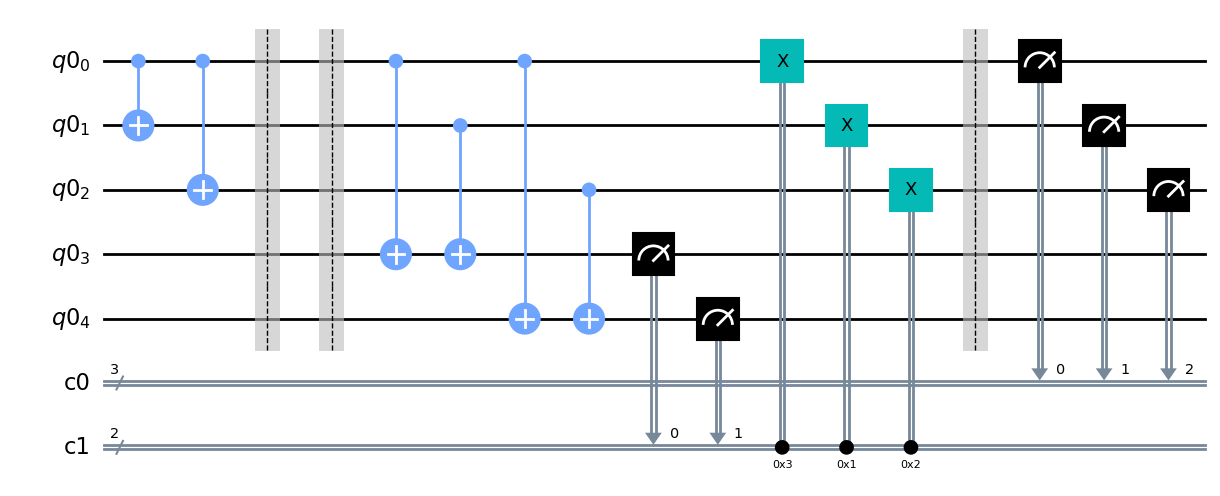

In [7]:
qc.draw('mpl')

In [10]:
# job = simulator_backend.run(qc, shots=10000)
# job = backend.run(qc, shots=10000)

In [17]:
# job.job_id()

In [12]:
# from qiskit import execute

In [13]:
from qiskit import transpile

transpiled_circuit = transpile(qc, backend)

In [21]:
transpiled_circuit.draw()

»
  ancilla_0 -> 0 ─────────────────────────────────────────────────────────────»
                           ┌───┐           ░ ┌───┐┌───┐          ┌─┐          »
       q1_0 -> 1 ──■────■──┤ X ├──■────────░─┤ X ├┤ X ├──────────┤M├──────────»
                   │  ┌─┴─┐└─┬─┘┌─┴─┐      ░ └─┬─┘└─┬─┘          └╥┘          »
       q1_3 -> 2 ──┼──┤ X ├──■──┤ X ├──■───░───■────┼─────────────╫───■───────»
                   │  └───┘     └───┘┌─┴─┐ ░ ┌───┐  │       ┌───┐ ║ ┌─┴─┐┌───┐»
       q1_2 -> 3 ──┼─────────────────┤ X ├─░─┤ X ├──┼────■──┤ X ├─╫─┤ X ├┤ X ├»
                 ┌─┴─┐               └───┘ ░ └─┬─┘  │    │  └─┬─┘ ║ └───┘└─┬─┘»
       q1_1 -> 4 ┤ X ├─────────────────────░───┼────■────┼────┼───╫────────┼──»
                 └───┘                     ░   │       ┌─┴─┐  │   ║        │  »
       q1_4 -> 5 ──────────────────────────░───■───────┤ X ├──■───╫────────■──»
                                           ░           └───┘      ║           »
  ancilla_1 -> 6 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
  ancilla_2 -> 7 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
  ancilla_3 -> 8 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
  ancilla_4 -> 9 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
 ancilla_5 -> 10 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
 ancilla_6 -> 11 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
 ancilla_7 -> 12 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
 ancilla_8 -> 13 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
 ancilla_9 -> 14 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
ancilla_10 -> 15 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
ancilla_11 -> 16 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
ancilla_12 -> 17 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
ancilla_13 -> 18 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
ancilla_14 -> 19 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
ancilla_15 -> 20 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
ancilla_16 -> 21 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
ancilla_17 -> 22 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
ancilla_18 -> 23 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           »
ancilla_19 -> 24 ─────────────────────────────────────────────────╫───────────»
                                                                  ║           

In [16]:
job = backend.run(transpiled_circuit)

In [19]:
job.job_id()

'ci8ski8k82m1odbm85pg'

In [8]:
# counts = job.result().get_counts()

In [ ]:
# execute()

In [68]:
job.get_counts()

{'00 111': 10000}

In [66]:
qc.draw()

░  ░                            ┌───┐                ░ ┌─┐   »
 q4_0: ──■────■───░──░───■─────────■──────────────┤ X ├────────────────░─┤M├───»
       ┌─┴─┐  │   ░  ░   │         │              └─╥─┘  ┌───┐         ░ └╥┘┌─┐»
 q4_1: ┤ X ├──┼───░──░───┼────■────┼────────────────╫────┤ X ├─────────░──╫─┤M├»
       └───┘┌─┴─┐ ░  ░   │    │    │                ║    └─╥─┘  ┌───┐  ░  ║ └╥┘»
 q4_2: ─────┤ X ├─░──░───┼────┼────┼────■───────────╫──────╫────┤ X ├──░──╫──╫─»
            └───┘ ░  ░ ┌─┴─┐┌─┴─┐  │    │  ┌─┐      ║      ║    └─╥─┘  ░  ║  ║ »
 q4_3: ───────────░──░─┤ X ├┤ X ├──┼────┼──┤M├──────╫──────╫──────╫────░──╫──╫─»
                  ░  ░ └───┘└───┘┌─┴─┐┌─┴─┐└╥┘┌─┐   ║      ║      ║    ░  ║  ║ »
 q4_4: ───────────░──░───────────┤ X ├┤ X ├─╫─┤M├───╫──────╫──────╫────░──╫──╫─»
                  ░  ░           └───┘└───┘ ║ └╥┘   ║      ║      ║    ░  ║  ║ »
c10: 3/═════════════════════════════════════╬══╬════╬══════╬══════╬═══════╩══╩═»
                                            ║  ║ ┌──╨──┐┌──╨──┐┌──╨──┐    0  1 »
c11: 2/═════════════════════════════════════╩══╩═╡ 0x3 ╞╡ 0x1 ╞╡ 0x2 ╞═════════»
                                            0  1 └─────┘└─────┘└─────┘         »
«          
« q4_0: ───
«          
« q4_1: ───
«       ┌─┐
« q4_2: ┤M├
«       └╥┘
« q4_3: ─╫─
«        ║ 
« q4_4: ─╫─
«        ║ 
«c10: 3/═╩═
«        2 
«c11: 2/═══
«

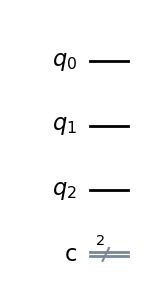

In [10]:
qc.draw('mpl')

In [11]:
qc = QuantumCircuit(2,2)

In [12]:
qc

In [14]:
qc.h(0)

qc.cx(0,1)

qc.measure([0,1],[0,1])

In [20]:
job = simulator_backend.run(qc, shots=10000)

In [22]:
job.get_counts()

{'00': 4945, '11': 5055}

In [23]:
job.get_counts()

{'00': 5064, '11': 4936}

In [24]:
job.get_probabilities()

{'00': 0.5, '11': 0.5}

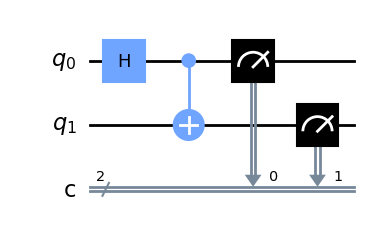

In [19]:
qc.draw('mpl')

In [25]:
qpu_backend = provider.get_backend('ionq_qpu')

In [26]:
qpu_job = qpu_backend.run(qc)

IonQAPIError: IonQAPIError(message='See https://docs.ionq.com/#tag/jobs for valid targets.',status_code=400,headers={'Date': 'Fri, 16 Jun 2023 21:57:28 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'cache-control': 'no-cache', 'vary': 'Origin', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Expose-Headers': 'x-ionq-session', 'strict-transport-security': "'max-age=86400; includeSubDomains'", 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '7d864effeddf040e-MAD'},body={"error":"Bad Request","statusCode":400,"message":"See https://docs.ionq.com/#tag/jobs for valid targets."},error_type='Bad Request')

In [ ]:
qpu_job

In [1]:
from qiskit import *

In [2]:
cq = QuantumRegister(2, 'code_qubits')

In [3]:
lq = QuantumRegister(1, 'link_qubits')

In [4]:
circuit = QuantumCircuit(cq, lq)

In [5]:
circuit.cx(cq[0], lq[0])

In [6]:
circuit.cx(cq[1],lq[0])

In [7]:
print(circuit)

                         
code_qubits_0: ──■───────
                 │       
code_qubits_1: ──┼────■──
               ┌─┴─┐┌─┴─┐
  link_qubits: ┤ X ├┤ X ├
               └───┘└───┘


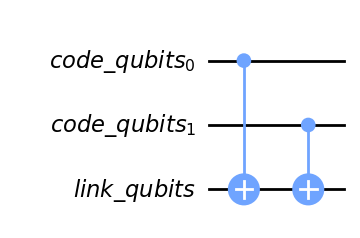

In [8]:
circuit.draw('mpl')

In [9]:
# import qiskit.ignis